## <u>  EDA & FE of Bike Rental Count Prediction </u>

### `Problem Statement` :

The goal of this project is about the doing the predication of bike rental count hourly or daily based on the environmental and seasonal settings. Here we will be building a simple and intutive way of interacting with environment factors such as temperature, wind, time and weather and anylyse how they efect the bike rentals.

### `Understanding the Data` :

The dataset for this project contains two datasets: “hour.csv” and “day.csv.” Attribute Information:

Both `hour.csv` and `day.csv` have the following fields, except hr which is not available in day.csv

<u> **_Columns Description :_** </u>


- instant : record index
 
- dteday : date

- season : season (1 : springer, 2 : summer, 3 : fall, 4 : winter)

- yr : year (0 : 2011, 1 : 2012)

- mnth : month ( 1 to 12)

- hr : hour (0 to 23)

- holiday : weather day is holiday or not (extracted from [Web Link])

- weekday : day of the week

- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

- weathersit :
    - 1 : Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2 : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3 : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4 : Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)

- atemp : Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)

- hum : Normalized humidity. The values are divided to 100 (max)

- windspeed : Normalized wind speed. The values are divided to 67 (max)

- casual: count of casual users

- registered : count of registered users

- cnt : count of total rental bikes including both casual and registered


<u> **_Dataset :_** </u>

The dataset used in this project is collected from https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

Here in this project we will use hour.csv data which will give the count hourly.

Downloaded dataset is uploaded to github and then from there url has been used to get the dataset.
The url of dataset is as :
 `dataset_download_url(hour.csv)` = https://raw.githubusercontent.com/Tanweer-Raza/data_set_for_project/main/hour.csv

**Importing Necessary Libraries**

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

%matplotlib inline

**Importing csv data as DataFrame using pandas**

In [8]:
dataset_download_url = "https://raw.githubusercontent.com/Tanweer-Raza/data_set_for_project/main/hour.csv"

In [9]:
df = pd.read_csv(dataset_download_url)

**Exploring the Data**

In [10]:
#First five rows of bike rental hour dataset
print(df.shape)
df.head()

(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Cleaning of not usable features**



- From above look of our dataset it is clear that these datatypes are either integers or floats.

- There are some features which is not required here like `instant` and `dteday` .

- Also the `yr` feature is not helpful in our predictive analysis as above dataset are only for 2011 and 2012 years. Prediction is going to be independent of the year number.

In [11]:
useless_features = ['instant', 'dteday', 'yr']
df = df.drop(useless_features, axis= 1)
df

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Identification of data types**

The `.dtypes method` to identify the data type of the variables in the dataset.

In [12]:
df.dtypes

season          int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Here all datatypes are already proper so no need of typecasting required here.

**Finding null values**

When we import our dataset from a CSV file, many blank columns are imported as null values into the Data Frame, which can later create problems while operating that data frame.` Pandas isnull() method` is used to check and manage NULL values in a data frame

In [13]:
df.isnull().sum()

season        0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

We can see that there are `no missing records` in the columns of the dataset. . Thats good . We don't need to handle null values here.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   mnth        17379 non-null  int64  
 2   hr          17379 non-null  int64  
 3   holiday     17379 non-null  int64  
 4   weekday     17379 non-null  int64  
 5   workingday  17379 non-null  int64  
 6   weathersit  17379 non-null  int64  
 7   temp        17379 non-null  float64
 8   atemp       17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  casual      17379 non-null  int64  
 12  registered  17379 non-null  int64  
 13  cnt         17379 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 1.9 MB


**Statistical Summary of the Numeric features in the dataset**

`Pandas describe() `is used to view some basic statistical details like count, percentiles, mean, std, and maximum value of a data frame or a series of numeric values. As it gives the count of each variable, we can identify the missing values using this method also.

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000
atemp,17379.0,0.475775,0.171850,0.00,0.3333,0.4848,0.6212,1.0000
hum,17379.0,0.627229,0.192930,0.00,0.4800,0.6300,0.7800,1.0000


Conclusions :
- Then cnt ranges between minimum of 1 bike rental in one hour to  maximum of 977 bikes rental in one hour. On average 189 bikes rental per hour which seems to be good number.


## Exploratory Analysis and Visualization

Text(0.5, 1.0, 'Distribution of count of rented bikes')

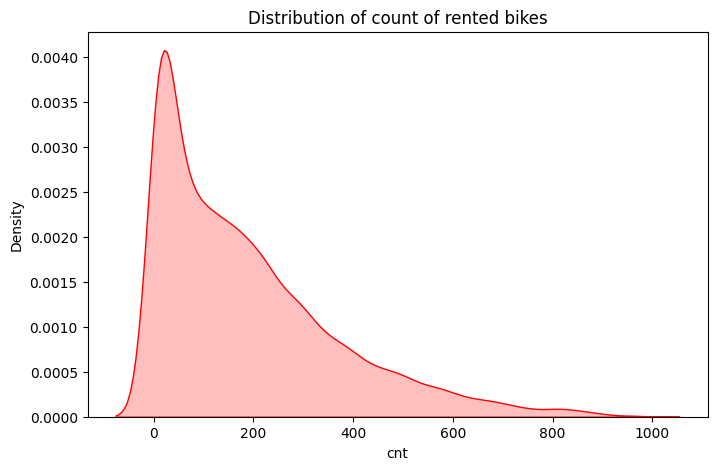

In [16]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['cnt'], color = 'r', fill = "shade")
plt.title("Distribution of count of rented bikes")

From above kde plot it can be concluded that majority bike rentals count is between 0 - 400 . Values higher than this are very less and can be taken as rare or outliers.

In [17]:
##Separating Numerical features and categorical features
numerical_features = ['mnth' , 'hr' ,'temp','atemp','hum','windspeed','casual','registered','cnt']
categorical_features = [features for features in df.columns if features not in numerical_features]

In [18]:
categorical_features

['season', 'holiday', 'weekday', 'workingday', 'weathersit']

In [19]:
numerical_features

['mnth',
 'hr',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

### Graphical Analysis for Numerical columns:



array([[<AxesSubplot:title={'center':'mnth'}>,
        <AxesSubplot:title={'center':'hr'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'hum'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'casual'}>,
        <AxesSubplot:title={'center':'registered'}>, <AxesSubplot:>]],
      dtype=object)

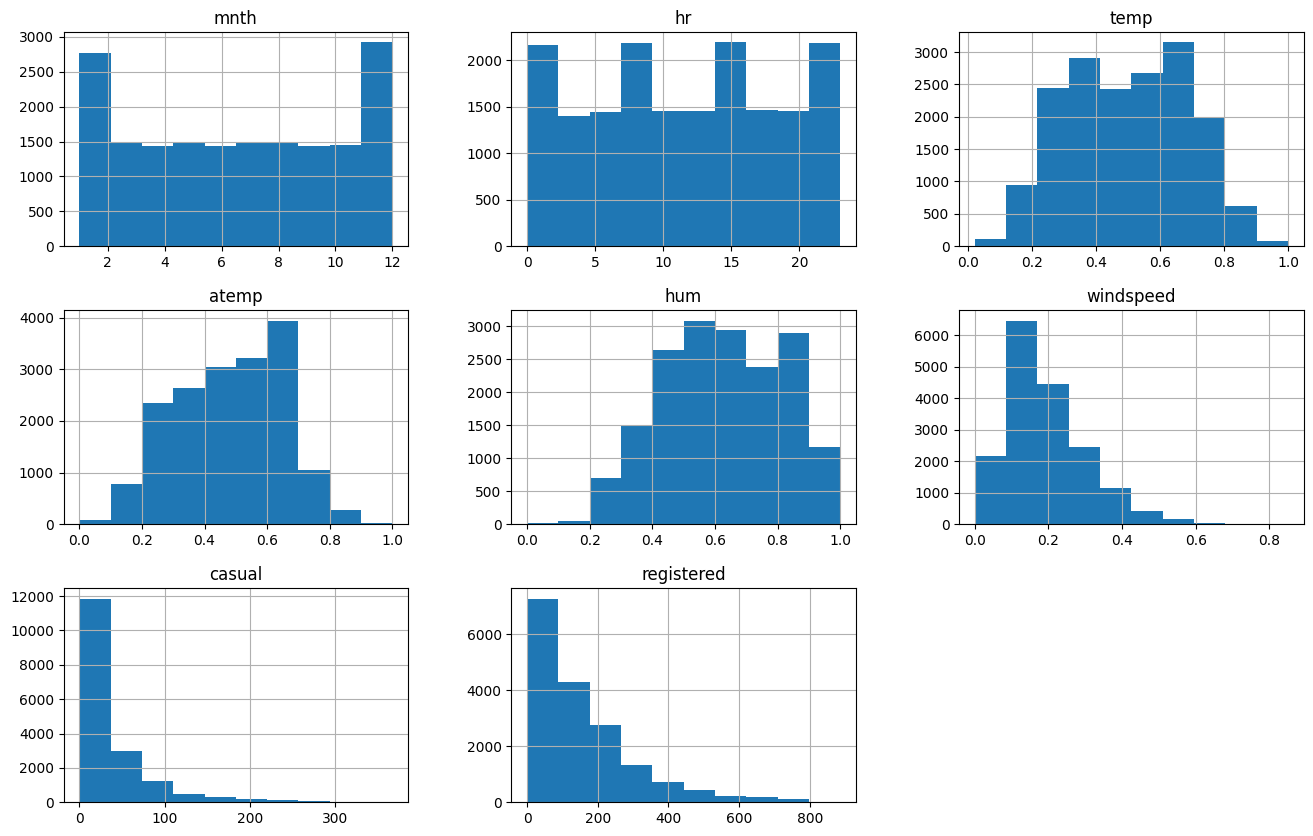

In [20]:
df.hist(numerical_features[:-1],  figsize=(16,10))

Conclusions :
- Histograms shows us the data distribution for a single continuous variable.
- The X-axis shows the range of values and Y-axis represent the number of values in that range. For example, in the above histogram of "atemp", there are around 4000 rows in data that has a value between 0.6 to 0.7.
- The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.
- Here casual and registered columns are right skewed and both columns seems to have almost same distribution so we can drop one of them. As the colleration between them will be high. We will see it later .

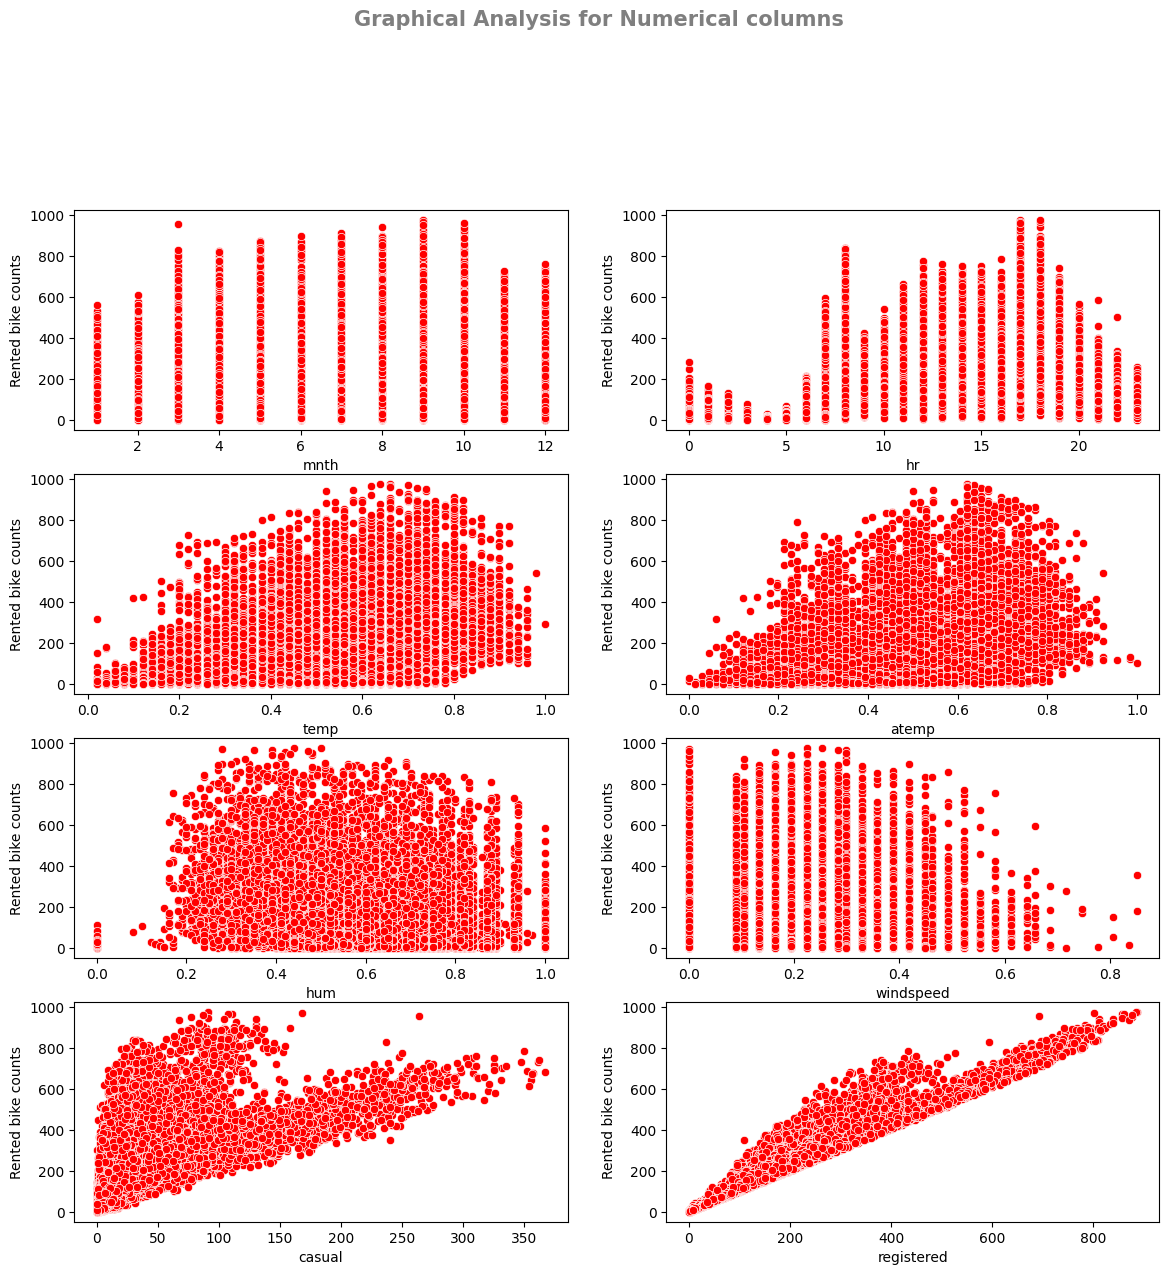

In [21]:
plt.figure(figsize=(14,20))
plt.suptitle("Graphical Analysis for Numerical columns" , fontsize = 15 , fontweight = 'bold',alpha = 0.5)

for i in range(0,len(numerical_features)-1):
    plt.subplot(6,2,i+1)
    sns.scatterplot(x = df[numerical_features[i]] , y =df['cnt'] ,color = 'r' )
    plt.xlabel(numerical_features[i])
    plt.ylabel("Rented bike counts")
    

**Report/Conclusion (Scatter charts interpretation):**

* What should we look for in these scatter charts?

    - Trend. we should try to see if there is a visible trend or not. There could be three scenarios

    - Increasing Trend: This means both variables are positively correlated. In simpler terms, they are directly proportional to each other, if one value increases, other also increases. This is good for ML!

    - Decreasing Trend: This means both variables are negatively correlated. In simpler terms, they are inversely proportional to each other, if one value increases, other decreases. This is also good for ML!

    - No Trend: we cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. Hence the predictor cannot be used for ML.

    - Based on this chart we can get a good idea about the predictor, if it will be useful or not. we confirm this by looking at the correlation value.


- Here temp and atemp has almost similar distribution. This will lead multicollinearity and redundancy , So we can drop one of them to make our data clean.

- Here `causal` and `registered` has almost similar distribution. This will lead multicollinearity and redundancy also , So we can drop one of them to make our data clean.

- As per the above scatter plot it can be clearly seen that there is like linear relationship between rented bike count and the temperature. As  the temperature is increasing the count is also increasing. This makes sense as people don't want to take  bike ride in winters but they prefer in summer.

- windspeed showing inverse relationship with the count of bike rented. With high windspeed the count of bikes decreasing.however, doesn’t give us a clear interpretation of how it affects usage. 

- There seems to be a negative correlation between the humidity and the usage rate,Higher humidity is correlated with higher chances of rainfall. This might be reason that users don't take rides during high humid time.

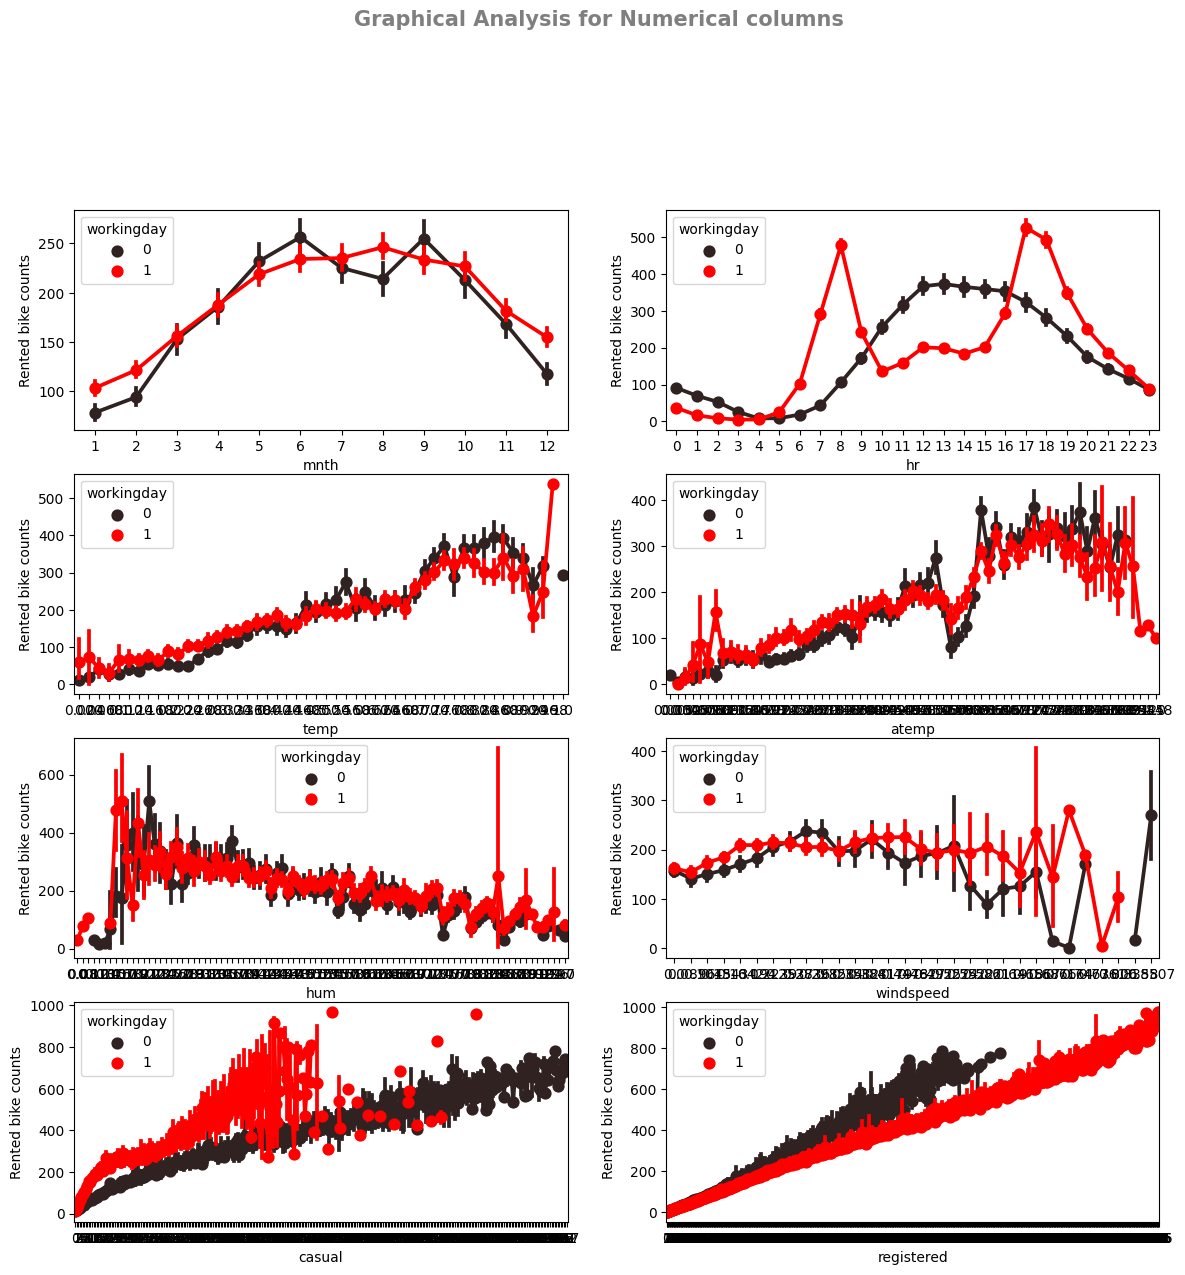

In [22]:
plt.figure(figsize=(14,20))
plt.suptitle("Graphical Analysis for Numerical columns" , fontsize = 15 , fontweight = 'bold',alpha = 0.5)

for i in range(0,len(numerical_features)-1):
    plt.subplot(6,2,i+1)
    sns.pointplot(x = df[numerical_features[i]] , y =df['cnt'] ,color = 'r' , hue=df['workingday'] )
    plt.xlabel(numerical_features[i])
    plt.ylabel("Rented bike counts")
    

<AxesSubplot:xlabel='hr', ylabel='cnt'>

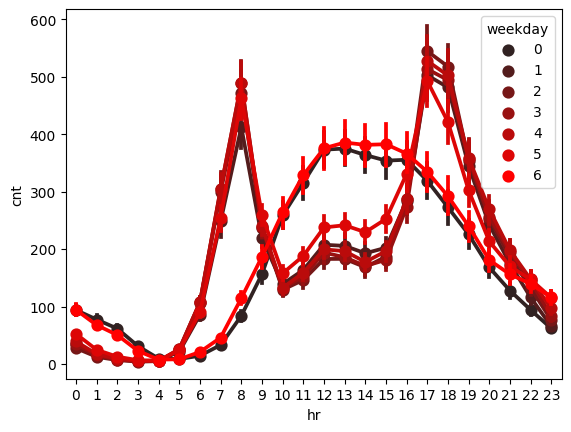

In [23]:
sns.pointplot(x = df['hr'] , y =df['cnt'] ,color = 'r' , hue=df['weekday'] )

#### Take :
-  From the above plots we can see the 2 patterns across the hours in a day in bike rentals.
    - Working Day: First pattern where there is a peak in the rentals at around 8am and another at around 5pm. These correspond to people who go to work on working day which are Monday to Friday.
    - Non Working Day: Second pattern where there is more or less a uniform rentals across the day with a peak at around noon time. These correspond to probably tourists who typically are casual users who rent/drop off bikes uniformly during the day and tour the city on non working days which typically are Saturday and Sunday.

- Also, we can see that we have more bike rentals during the Fall (July to September) and Summer (April to June) Season.

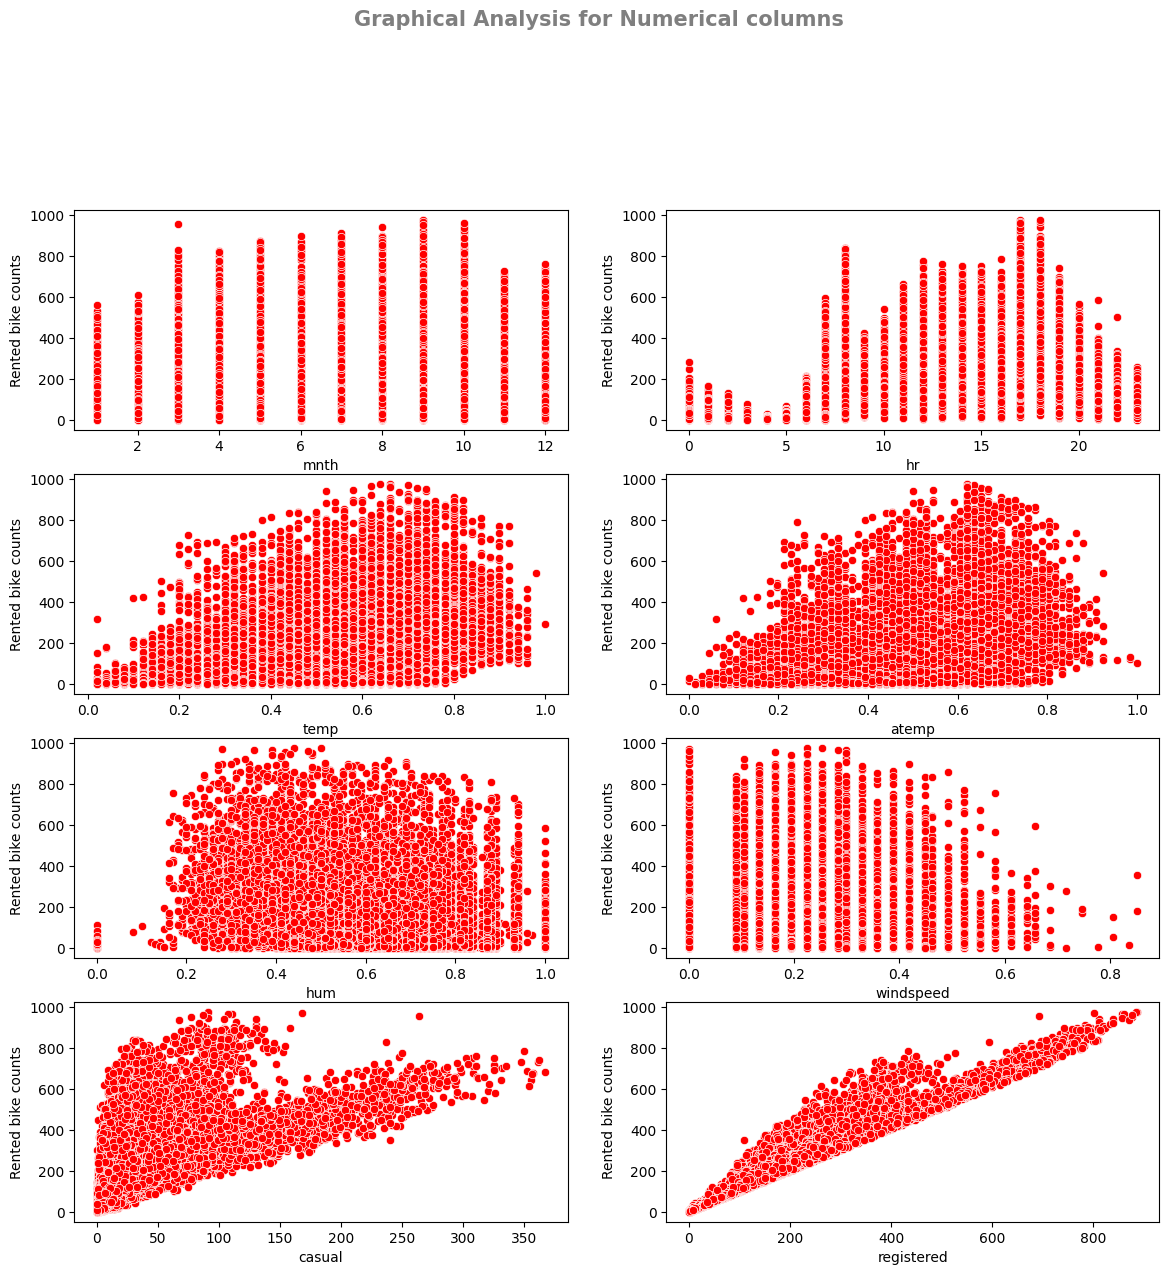

In [24]:
plt.figure(figsize=(14,20))
plt.suptitle("Graphical Analysis for Numerical columns" , fontsize = 15 , fontweight = 'bold',alpha = 0.5)

for i in range(0,len(numerical_features)-1):
    plt.subplot(6,2,i+1)
    sns.scatterplot(x = df[numerical_features[i]] , y =df['cnt'] ,color = 'r' )
    plt.xlabel(numerical_features[i])
    plt.ylabel("Rented bike counts")
    

##### Heat Map for Multicollinearity

In [25]:
df[numerical_features].corr()

,mnth,hr,temp,atemp,hum,windspeed,casual,registered,cnt
mnth,1.000000,-0.005772,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.005772,1.000000,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
temp,0.201691,0.137603,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.208096,0.133750,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
hum,0.164411,-0.276498,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.135386,0.137252,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.068457,0.301202,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564
registered,0.122273,0.374141,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000,0.972151
cnt,0.120638,0.394071,0.404772,0.400929,-0.322911,0.093234,0.694564,0.972151,1.000000


<AxesSubplot:>

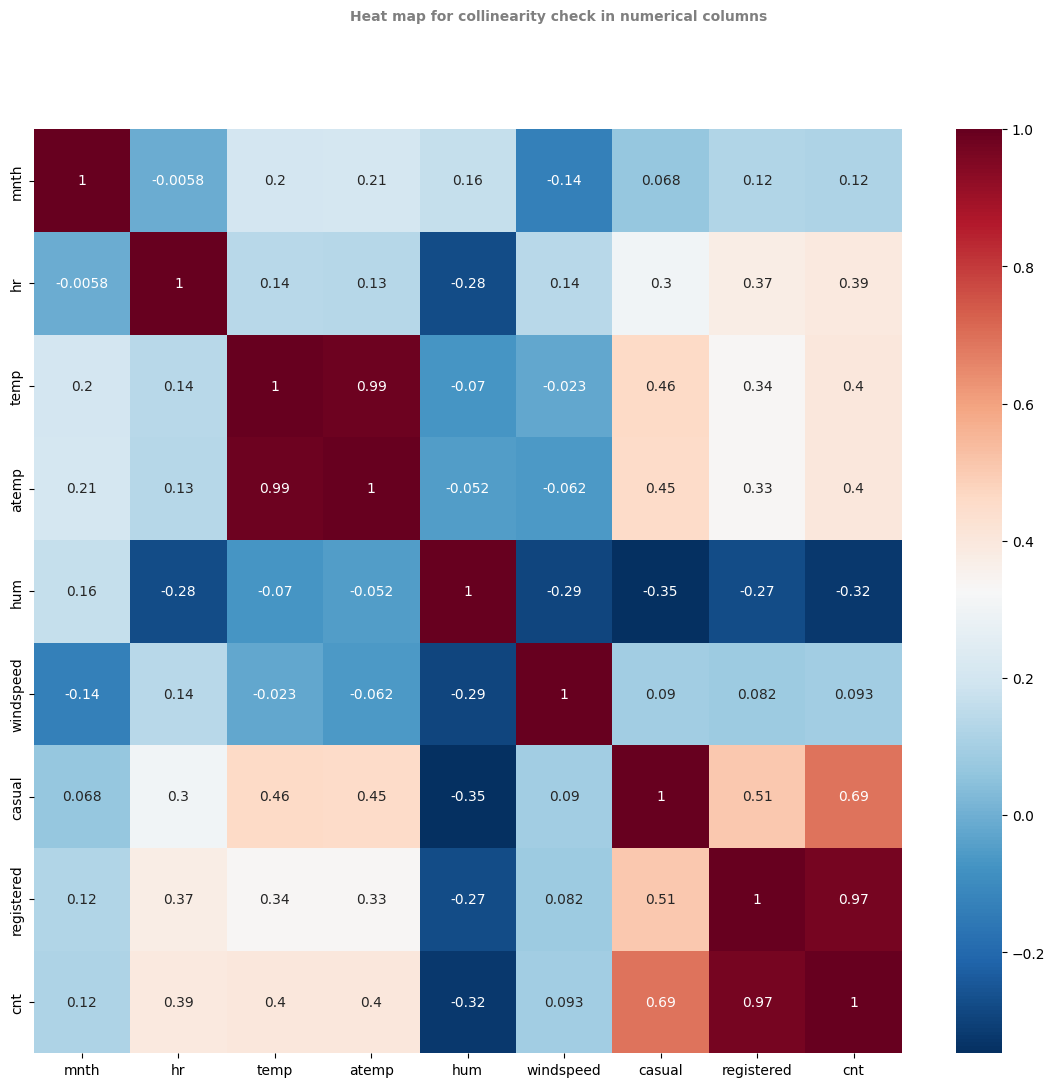

In [26]:
plt.figure(figsize=(14,12))
plt.suptitle("Heat map for collinearity check in numerical columns" , fontsize = 10 , fontweight = 'bold',alpha = 0.5)
sns.heatmap(df[numerical_features].corr(), cmap='RdBu_r', annot= True)


##### Inferences from the above heatmap

- temp (true temperature) and atemp (feels like temperature) are highly correlated as expected. So we can drop one of them.

- count is highly correlated with casual and registered as expected since count = casual + registered.So for the rest of the project, we will ignore the Registered and Casual count and work with just the Total count as our output.

- We see a positive correlation between count and temperature . This is probably only true for the range of temperatures provided.

- We see a negative correlation between count and humidity. The more the humidity, the less people prefer to bike
Not a great amount of correlation between humidity and temperature, though.

- Count has a weak dependence on windspeed. So we can drop that column.

In [27]:
df.drop(['atemp'],axis=1,inplace=True)

In [28]:
df.drop(['windspeed'],axis =1 ,inplace=True)

In [29]:

df.drop(['casual','registered'], axis =1,inplace=True)

### Graphical Analysis for Categorical columns:

In [30]:
categorical_features

['season', 'holiday', 'weekday', 'workingday', 'weathersit']

array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>],
       [<AxesSubplot:title={'center':'weekday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'weathersit'}>, <AxesSubplot:>]],
      dtype=object)

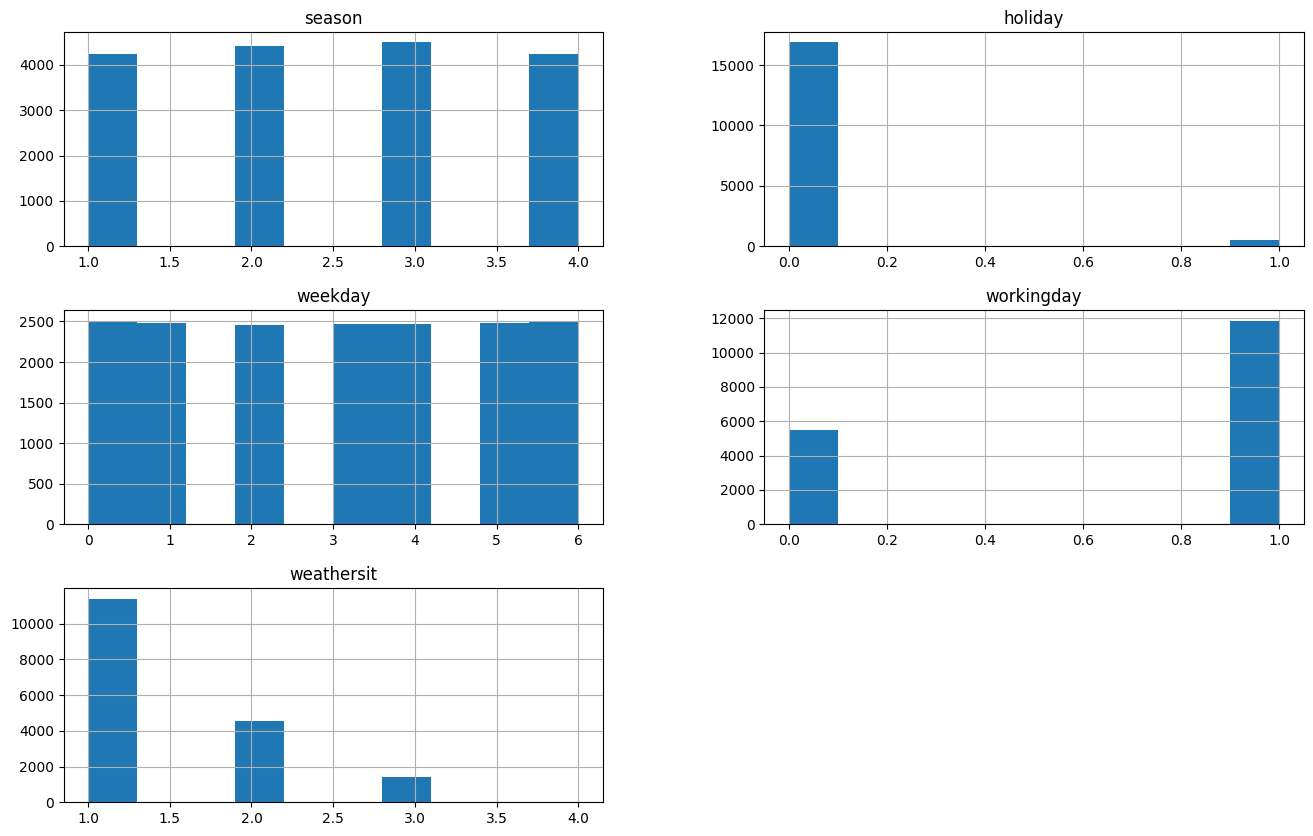

In [31]:
df.hist(categorical_features , figsize=(16,10))

Conclusions:
- These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

- In the ideal bar chart each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

- If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

- In this data, "holiday" is skewed. There is just one bar which is dominating and other categories have very less rows. Such columns may not be correlated with the target variable because there is no information to learn. The algorithms cannot find any rule like when the value is this then the target variable is that. We take a final call for such columns in the correlation section.

In [32]:
df[['season','cnt']].groupby(['season']).sum().reset_index()

,season,cnt
0,1,471348
1,2,918589
2,3,1061129
3,4,841613


In [33]:
xtick_list = [["spring","sumer","fall","winter"],
['No' , "Yes"],
['Monday', 'Teusday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
['No','Yes'],
['Clear','Mist','Light Snow','Heavy Rain']]


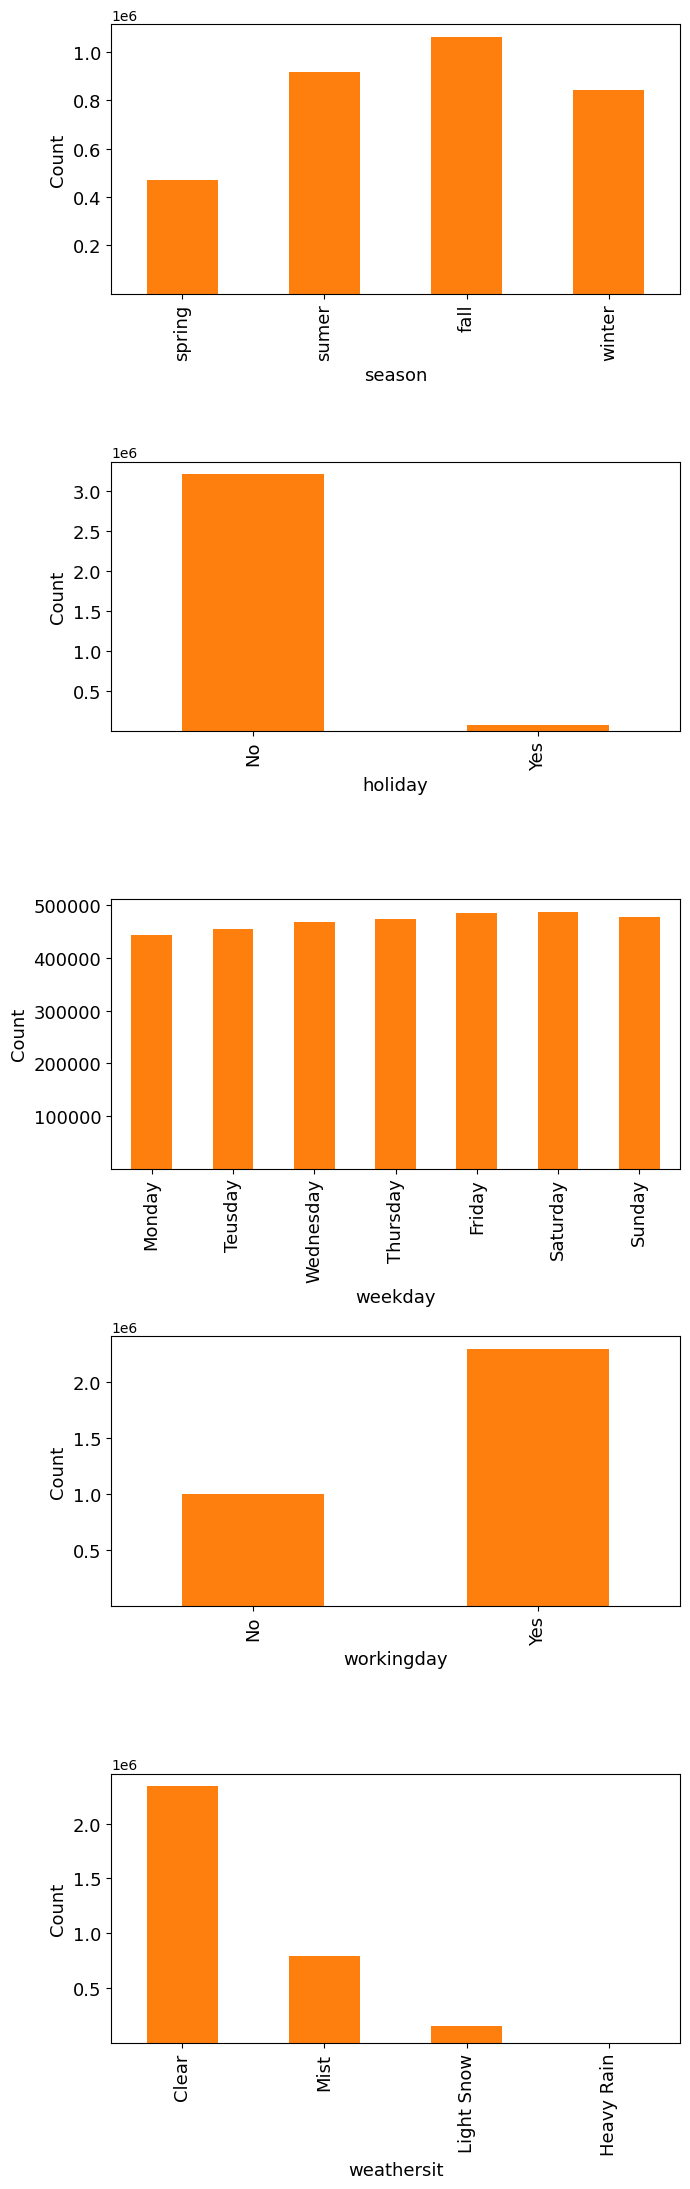

In [34]:
f,  (ax1, ax2 ,ax3, ax4, ax5)  =  plt.subplots(nrows=5, ncols=1, figsize=(7, 22))
ax_list = [ax1, ax2 , ax3, ax4, ax5]
for i in range(0,len(categorical_features)):
    df_temp = df[[categorical_features[i],'cnt']].groupby([categorical_features[i]]).sum().reset_index()
    ax_list[i] = df_temp.plot(kind='bar', legend=False ,stacked=True,fontsize=13 ,ax=ax_list[i])
    ax_list[i].set_xlabel(categorical_features[i],fontsize = 13)
    ax_list[i].set_ylabel("Count" , fontsize = 13)
    ax_list[i].set_xticklabels(xtick_list[i])
f.tight_layout()

**Outliers Handling** 

- Outliers are extreme values in the data which are far away from most of the values. We can see them as the tails in the histogram.
- Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

*Why I should treat the outliers?*

- Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.
There are below two options to treat outliers in the data.

- - Option-1: Delete the outlier Records. Only if there are just few rows lost.
- - Option-2: Impute the outlier values with a logical business value

Below we are finding out the most logical value to be replaced in place of outliers by looking at the histogram.

##### In this data no prominent outliers are present, hence, not treating outlier in this section

### Data Preprocessing

In [40]:
selected_columns_for_pred = df.columns
selected_columns_for_pred

Index(['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'cnt'],
      dtype='object')

In [41]:
df.dtypes

season          int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
hum           float64
cnt             int64
dtype: object

**Splitting data in to independent and dependent columns X, y**

In [42]:
X = df.drop(['cnt'], axis = 1)
y = df['cnt']

In [43]:
X.shape , y.shape

((17379, 9), (17379,))

In [47]:
numerical_features = ['mnth',
  'hr',
  'temp',
  'hum',
  'cnt']
categorical_features =[i for i in df.columns if i not in numerical_features]

In [48]:
numerical_features,categorical_features


(['mnth', 'hr', 'temp', 'hum', 'cnt'],
 ['season', 'holiday', 'weekday', 'workingday', 'weathersit'])

In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

st_scalar = StandardScaler()
one_encoder = OneHotEncoder()

preprocessor = ColumnTransformer(
    [("OneHotencoder", one_encoder, categorical_features),
    ("StandardScaler" , st_scalar , numerical_features[:-1])]
)

X = preprocessor.fit_transform(X)

**Train and Test split**

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2 , random_state=42)

In [54]:
X_train.shape,   X_test.shape

((13903, 23), (3476, 23))

**Model Selection**

In [55]:
# Creating function to evaluate our models

from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score

def model_evaluation(true_value, predicted_value):
    mae = mean_absolute_error(true_value, predicted_value)
    mse = mean_squared_error(true_value, predicted_value)
    rmse = np.sqrt(mean_squared_error(true_value, predicted_value))
    r2_square = r2_score(true_value, predicted_value)
    return mae, rmse, r2_square

In [60]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor


from catboost import CatBoostRegressor
from xgboost import XGBRegressor

model_list = [LinearRegression() ,
          Ridge() , 
          Lasso() ,
          KNeighborsRegressor(),
          RandomForestRegressor(), 
          DecisionTreeRegressor(),  
          CatBoostRegressor(verbose=False) ,
          XGBRegressor(),
          AdaBoostRegressor()
          ]


In [61]:
from sklearn.model_selection import cross_val_score
r2_test = []
r2_train = []
model_list_name = ["Linear Regression", "Ridge", "Lasso", "KNeighbors Regressor","Random Forest Regressor", "Decision Tree Regressor" , "Cat Boost Regressor", "XGB Regressor", "AdaBoostRegressor"]
for model in range(len(model_list)) :

    # Training our model
    model_list[model].fit(X_train, y_train)

    # Making predictions
    y_train_predicted = model_list[model].predict(X_train)
    y_test_predicted = model_list[model].predict(X_test)

    # Evaluating train and test dataset
    model_train_mae , model_train_rmse, model_train_r2 = model_evaluation(y_train, y_train_predicted)
    model_test_mae , model_test_rmse, model_test_r2 = model_evaluation(y_test, y_test_predicted)


    r2_test.append(model_test_r2)
    r2_train.append(model_train_r2)

    
    print(model_list_name[model])
    print('Model performance for Training set')

    print(f"---> Mean Absolute Error: {model_train_mae}")
    print(f"---> Root Mean Squared Error: {model_train_rmse}")
    print(f"---> R2 Score: {model_train_r2}")


    print("__________________________________________________________")
    
    print('Model performance for Test set')


    print(f"---> Mean Absolute Error: {model_test_mae}")
    print(f"---> Root Mean Squared Error: {model_test_rmse}")
    print(f"---> R2 Score: {model_test_r2}")

    
    print('*'*45)
    print('\n')




Linear Regression
Model performance for Training set
---> Mean Absolute Error: 108.16489471696757
---> Root Mean Squared Error: 147.00022606996353
---> R2 Score: 0.3491622379374182
__________________________________________________________
Model performance for Test set
---> Mean Absolute Error: 105.63414305235904
---> Root Mean Squared Error: 142.6272868803518
---> R2 Score: 0.3575784395565522
*********************************************


Ridge
Model performance for Training set
---> Mean Absolute Error: 108.1166977236214
---> Root Mean Squared Error: 146.99633570319722
---> R2 Score: 0.3491966863755297
__________________________________________________________
Model performance for Test set
---> Mean Absolute Error: 105.57376084224805
---> Root Mean Squared Error: 142.63860293833463
---> R2 Score: 0.35747649597794473
*********************************************


Lasso
Model performance for Training set
---> Mean Absolute Error: 108.05522500544865
---> Root Mean Squared Error: 147

`Result (r2 score) of all models at one place`

In [62]:
R2_square_all_Models = pd.DataFrame(zip(model_list_name, r2_test , r2_train,) ,columns= ["Model" , "R2_square_test","R2_square_train",]).sort_values(by=['R2_square_test'], ascending= False).reset_index(drop=True)
R2_square_all_Models["R2_score_diff"] = R2_square_all_Models['R2_square_train']-R2_square_all_Models['R2_square_test']
R2_square_all_Models

,Model,R2_square_test,R2_square_train,R2_score_diff
0,Cat Boost Regressor,0.882035,0.911237,0.029202
1,XGB Regressor,0.877305,0.931605,0.054300
2,Random Forest Regressor,0.860320,0.979712,0.119392
3,Decision Tree Regressor,0.740169,0.999121,0.258952
4,KNeighbors Regressor,0.705443,0.803811,0.098369
5,AdaBoostRegressor,0.601027,0.612723,0.011697
6,Linear Regression,0.357578,0.349162,-0.008416
7,Ridge,0.357476,0.349197,-0.008280
8,Lasso,0.355430,0.346866,-0.008564


Here we can use top three with high r2 square score for hyper parameter tunning in order to improve the score.
So we will use 	Random Forest Regressor,Cat Boost Regressor and XGB Regressor.

In [66]:
#Initialize few parameter for Hyperparamter tuning
randomforest_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]
             }

xgboost_params = {"learning_rate": [0.1, 0.01, 0.05],
            "max_depth": [3,4,5,6,8,10],
            "n_estimators": [100, 200, 300],
            "booster": ["gbtree" ,"gblinear" , "dart"],
            "objective" : ['reg:linear']
           }

catboost_params = {"learning_rate": [0.1, 0.01, 0.05],
              "max_depth": [6, 8, 12, 20, 30]}
              

In [67]:
# Models list for Hyperparameter tuning
randomcv_models = [("RandomForest", RandomForestRegressor(), randomforest_params),
                   ('XgBoost', XGBRegressor(), xgboost_params),
                   ('CatBoost', CatBoostRegressor(verbose=False), catboost_params)
                   ]

In [68]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
[21:29:37] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


e:\Projects\ML(RentalBikeSharePrediction)\Raza-Rental_Bike_Share_Predictio_ML_project_03n\venv\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 15 is smaller than n_iter=100. Running 15 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Fitting 3 folds for each of 15 candidates, totalling 45 fits


e:\Projects\ML(RentalBikeSharePrediction)\Raza-Rental_Bike_Share_Predictio_ML_project_03n\venv\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "e:\Projects\ML(RentalBikeSharePrediction)\Raza-Rental_Bike_Share_Predictio_ML_project_03n\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\Projects\ML(RentalBikeSharePrediction)\Raza-Rental_Bike_Share_Predictio_ML_project_03n\venv\lib\site-packages\catboost\core.py", line 5733, in fit
    save_sna

---------------- Best Params for RandomForest -------------------
{'n_estimators': 100, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}
---------------- Best Params for XgBoost -------------------
{'objective': 'reg:linear', 'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.1, 'booster': 'gbtree'}
---------------- Best Params for CatBoost -------------------
{'max_depth': 12, 'learning_rate': 0.05}


### Retraining the Model with best Parameters obtained from Random Search CV

In [73]:
models = {
    "Random Forest Regressor": RandomForestRegressor(**model_param['RandomForest']),
    "XgBoostRegressor": XGBRegressor(**model_param['XgBoost']), 
     "CatBoosting Regressor": CatBoostRegressor(**model_param['CatBoost'] ,verbose=False)
}

model_list = []
r2_list_test = []
r2_list_train = []


for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae , model_train_rmse, model_train_r2 = model_evaluation(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = model_evaluation(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    r2_list_test.append(model_test_r2)
    r2_list_train.append(model_train_r2)
    
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('_'*25)
    print('\n')

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 25.0941
- Mean Absolute Error: 16.1310
- R2 Score: 0.9810
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 63.8304
- Mean Absolute Error: 41.1406
- R2 Score: 0.8713
_________________________


[21:40:48] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
XgBoostRegressor
Model performance for Training set
- Root Mean Squared Error: 29.8285
- Mean Absolute Error: 19.2202
- R2 Score: 0.9732
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 60.4981
- Mean Absolute Error: 38.8464
- R2 Score: 0.8844
_________________________


CatBoosting Regressor
Model performance for Training set
- Root Mean Squared Error: 30.7201
- Mean Absolute Error: 20.6789
- R2 Score: 0.9716
----------------------------------
Model p

## Results after Hyperparameter Tuning

In [75]:
R2_square_all_Models_HT = pd.DataFrame(zip(model_list, r2_list_test , r2_list_train,) ,columns= ["Model" , "R2_square_test","R2_square_train",]).sort_values(by=['R2_square_test'], ascending= False).reset_index(drop=True)
R2_square_all_Models_HT["R2_score_diff"] = R2_square_all_Models_HT['R2_square_train']-R2_square_all_Models_HT['R2_square_test']
R2_square_all_Models_HT

,Model,R2_square_test,R2_square_train,R2_score_diff
0,CatBoosting Regressor,0.897210,0.971576,0.074366
1,XgBoostRegressor,0.884416,0.973202,0.088786
2,Random Forest Regressor,0.871332,0.981034,0.109702


**`We can use top two models in our pipeline.`**